In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

df = pd.read_csv("../data/survey lung cancer.csv", index_col=False)

In [182]:
# df['LUNG_CANCER'] = df['LUNG_CANCER'].replace('YES', 2) 
# df['LUNG_CANCER'] = df['LUNG_CANCER'].replace('NO', 1) 
# df['GENDER'] = df['GENDER'].replace('M',2)  # male was changed to 2
# df['GENDER'] = df['GENDER'].replace('F',1)
# # print(df['LUNG_CANCER'])
# df.to_csv('../data/survey lung cancer.csv', index = False)

X = df.drop('LUNG_CANCER', axis = 1)
y = df['LUNG_CANCER']

[1.0, 1.0, 1.0, 1.0, 0.5658292925538109, 0.5658292925538109, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


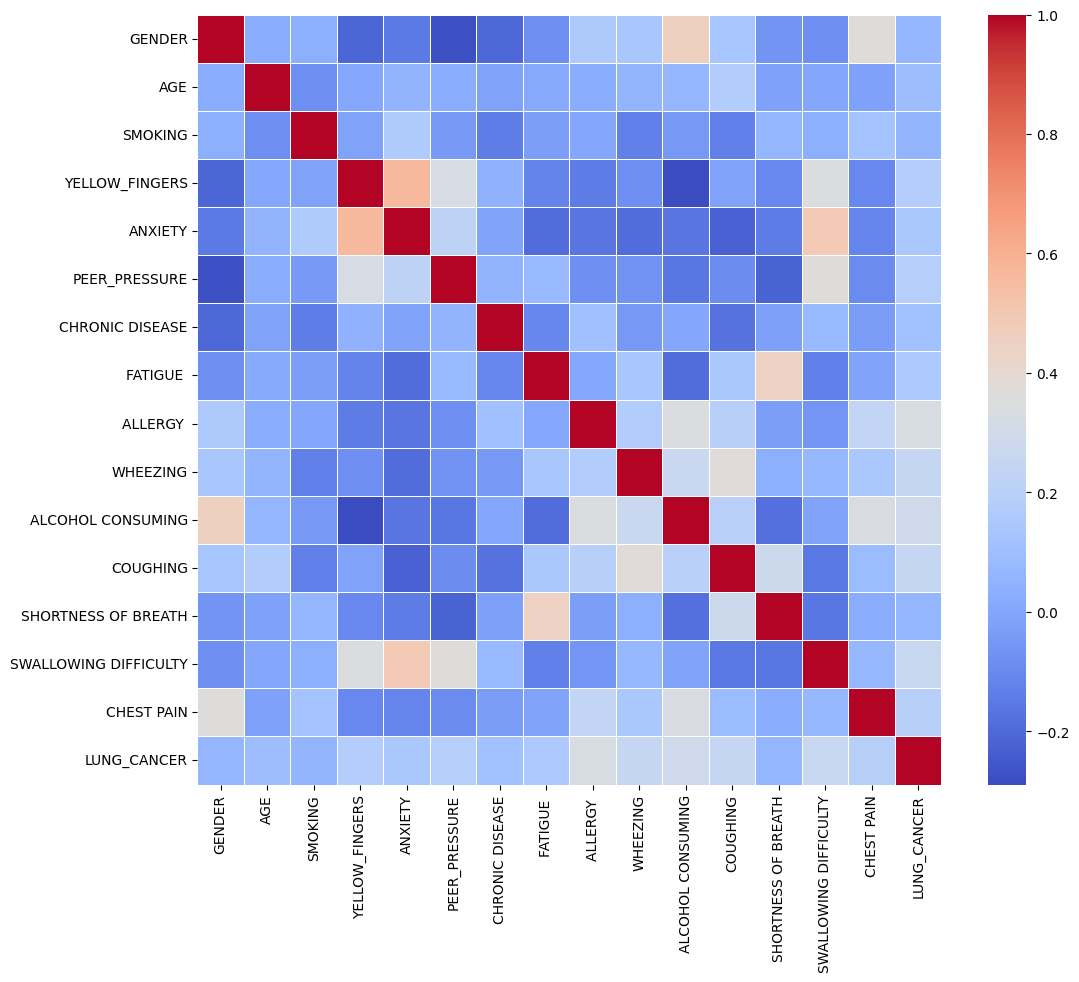

In [186]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))  # Set the figure size (optional)
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)

# Show the heatmap
# plt.show()

length, z = correlation_matrix.shape

type(correlation_matrix)

high_corr = []
for i in range(length):
    for j in range(length):
        if correlation_matrix.iloc[i][j]>=.5:
            high_corr.append(correlation_matrix.iloc[i][j])

print(high_corr)

In [184]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8274)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
# print(f"{classification_report}")

# y_pred, y_test

Accuracy: 0.967741935483871
Precision: 1.0
Recall: 0.625
F1 Score: 0.7692307692307693


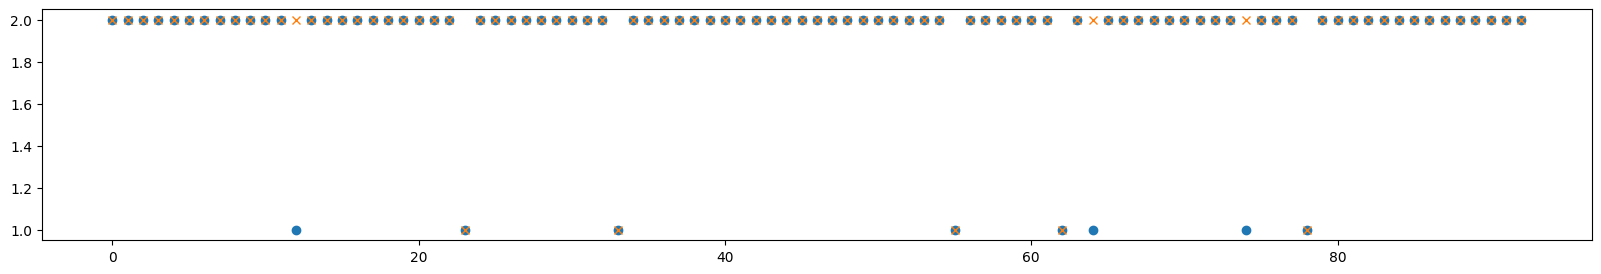

In [185]:
plt.figure(figsize=(20, 3))  # Specify width and height in inches
x = np.linspace(0,92,93)
plt.plot(x,y_test, 'o')
plt.plot(x,y_pred, 'x')
plt.show()